In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("student-mat.csv", delimiter=";")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

categorical_cols = data.select_dtypes(include=['object']).columns
numerical_binary_cols = data.select_dtypes(exclude=['object']).columns

df_categorical_dummies = pd.get_dummies(data[categorical_cols])
df_final = pd.concat([data[numerical_binary_cols], df_categorical_dummies], axis=1)

data = df_final

In [4]:
m, n = data.shape
# This is the training data.
x_train = data[:int(0.6*m)]
y_train = x_train["G3"]

# This is the testing data.
x_test = data[int(0.6*m):int(0.8*m)]
y_test = x_test["G3"]

# This is the cross validation data.
x_cv = data[int(0.8*m):]
y_cv = x_cv["G3"]

# Removing the answers from training & testing data.
x_train = x_train.drop(columns=["G3"])
x_test = x_test.drop(columns=["G3"])
x_cv = x_cv.drop(columns=["G3"])

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_cv_np = x_cv.to_numpy()
y_cv_np = y_cv.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

m, n = x_train_np.shape

# Defining initial parameters
W = np.full((n), 0.05)
b = 1


In [5]:
# Feature scaling
# z = x - mu / sigma
x_train_np = (x_train_np - np.mean(x_train_np, axis=0)) / np.std(x_train_np, axis=0)

In [6]:
print("Shape of data:", data.shape,"\n")

print("Shape of training data:", x_train.shape)
print("shape of training actual final grades:", y_train.shape, "\n")

print("shape of Testing examples:", x_test.shape)
print("shape of Testing examples final grades", y_test.shape, "\n")

print("shape of Cross Validation examples:", x_cv.shape)
print("shape of Cross Validation examples final grades", y_cv.shape)



Shape of data: (395, 59) 

Shape of training data: (237, 58)
shape of training actual final grades: (237,) 

shape of Testing examples: (79, 58)
shape of Testing examples final grades (79,) 

shape of Cross Validation examples: (79, 58)
shape of Cross Validation examples final grades (79,)


In [7]:
def f_wb(x, W, b):
    if W.shape == x.shape:
        return np.dot(W,x) + b
    else:
        return np.matmul(x,W) + b
    


In [8]:
def cost_function(x, y, W, b):
    #print(f_wb(x,W,b)- y)
    m, n = x.shape
    cost = np.sum((f_wb(x, W, b) - y)**2, axis=0)
    return cost / (2*m)

cost_function(x_train_np,y_train_np, W, b)


53.41612890953747

In [9]:

cost_history = []
def gradient_descent(x,y,W,b):
    learning_rate = 0.1
    m,n = x.shape
    
    dJ_dW = 0
    dJ_db = 0
    for i in range(n):
        dJ_dW += (f_wb(x[i],W,b) - y[i]) * x[i]
        dJ_db += (f_wb(x[i],W,b) - y[i])
    dJ_dW = dJ_dW / m
    dJ_db = dJ_db / m

    # dJ_dw = np.sum(f_wb(x,W,b)- y, axis=0) / m
    # dJ_db = np.sum(f_wb(x,W,b)- y, axis=0) / m

    W = W - learning_rate*dJ_dW
    b = b - learning_rate*dJ_db

    return W, b
    
for epochs in range(6001):
    W, b = gradient_descent(x_train_np, y_train_np, W , b)
    
    cost = cost_function(x_train_np, y_train_np, W, b)
    cost_history.append(cost)
    if epochs % 500 == 0:

        print(f"Iteration {epochs} the cost is: {cost:.5f}")
        



Iteration 0 the cost is: 50.10381


Iteration 500 the cost is: 5.38349
Iteration 1000 the cost is: 5.17217
Iteration 1500 the cost is: 5.07990
Iteration 2000 the cost is: 5.02929
Iteration 2500 the cost is: 5.00121
Iteration 3000 the cost is: 4.98489
Iteration 3500 the cost is: 4.97483
Iteration 4000 the cost is: 4.96827
Iteration 4500 the cost is: 4.96382
Iteration 5000 the cost is: 4.96070
Iteration 5500 the cost is: 4.95846
Iteration 6000 the cost is: 4.95684


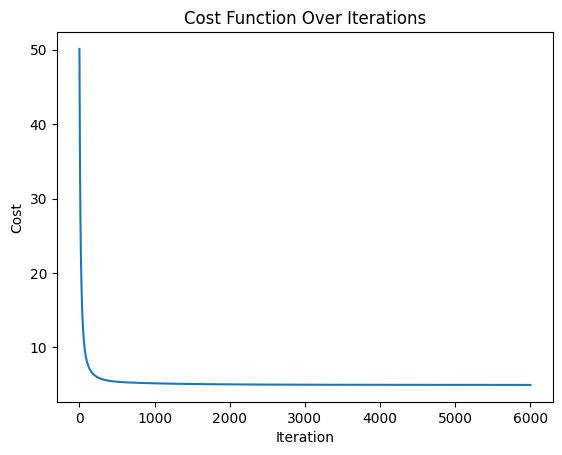

In [10]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

In [14]:
def check_train(i):
    print(f_wb(x_train_np[i], W, b))
    print(y_train_np[i])


def check_cv(i):
    print(round(f_wb(x_cv_np[i], W, b)))
    print(y_cv_np[i])


check = 57

#check_train(check)
check_cv(check)

84
18


In [15]:
def costs():
    j_train = cost_function(x_train_np, y_train_np, W, b)
    j_cv = cost_function(x_cv_np, y_cv_np, W, b)
    print("j_train is:", j_train)
    print("j_cv is:", j_cv)
    print(j_cv/j_train)

costs()

j_train is: 4.956840359641823
j_cv is: 1161.6253990330088
234.34795449352475


In [13]:
print(x_cv_np.shape)
print(x_train_np.shape)

(79, 58)
(237, 58)
